In [3]:
%matplotlib inline
from scipy.constants import zero_Celsius
import matplotlib.pyplot as plt
import numpy as np

from flask import Flask, render_template, request, jsonify



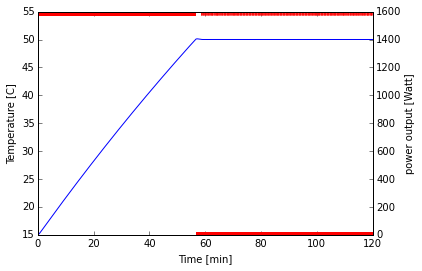

In [14]:
import pid

class model(object):
    def __init__(self, volume, heatpower, loss, roomtemp, T0):
        self.volume = volume
        self.heatpower = heatpower
        self.loss = loss
        self.roomtemp = roomtemp
        self.T = T0
        self.H0 = 0
        self.reaction = 0.05
        self.pid_value = 0
    def step(self, delta):
        E0 = self.volume*Cs*self.T
        self.H0 = self.H0 + self.reaction*(self.heatpower * self.pid_value - self.H0) * delta
        E1 = E0 + self.H0 * delta + self.loss * (self.roomtemp - self.T) * delta
        self.T = E1 / (Cs * self.volume)


temperatures = []
pid_out = []



t = np.linspace(0,120,120*60)

setpoint = 50
volume = 35 # kg
heatpower = 1600 # Watt
Cs = 4.1813e3 # J/(kg*K)
loss = 10 # W/K
roomtemp = 25 # C
T0 = 15 # C
m = model(volume, heatpower, loss, roomtemp, T0)
for i in t:
    m.step(1)
    temperatures.append(m.T)
    #pid_value = PID.calcPID_reg4(T, setpoint, True)
    if m.T > setpoint:
        m.pid_value = 0
    else:
        m.pid_value = 1
    pid_out.append(m.pid_value*heatpower)
    
plt.plot(t, np.array(temperatures))
plt.xlabel('Time [min]')
plt.ylabel('Temperature [C]')
plt.twinx()
plt.plot(t, pid_out, '|r')
plt.ylabel('power output [Watt]')

